# FFT Analysis

This notebook is meant for analysing `.wav` samples with Python. The `preview` function allows easy inspection of audio files by plotting graphs of amplitude against time and frequency.

In [325]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import rfft, rfft2, rfftfreq
from scipy.io import wavfile

In [326]:
# plot amplitude against time and amplitude against frequency graphs
def preview(
    filename,
    bits_per_sample=8,
    amplitude_range=(0, 1000),
    frequency_range=(0, 1000),
):
    display.display(display.Audio(filename))

    sample_rate, data = wavfile.read(filename)
    num_samples = len(data)
    num_channels = 1 if len(data.shape) == 1 else data.shape[1]
    duration = num_samples / sample_rate

    x1 = np.linspace(0, duration, num_samples, endpoint=False)
    y1 = (data / 255 * 2 - 1) if bits_per_sample == 8 else data / 32768 # normalize values

    x2 = rfftfreq(num_samples, 1 / sample_rate)
    y2 = rfft2(y1) if num_channels == 2 else rfft(y1)

    # amplitude against time
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.title("Amplitude against Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized amplitude")
    plt.axhline(0, linestyle='--').set_color('black')
    begin, end = amplitude_range 
    plt.plot(x1[begin: end], y1[begin:end])

    # amplitude against frequency bins
    plt.subplot(1, 2, 2)
    plt.title("Amplitude against Frequency")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Normalized amplitude")
    begin, end = frequency_range 
    plt.plot(x2[begin:end], np.abs(y2[begin:end]))

    plt.show()

### 8-bit Audio

`samples/8-bit.wav` is an 8-bit audio file with a pure tone of A4 (440 Hz).

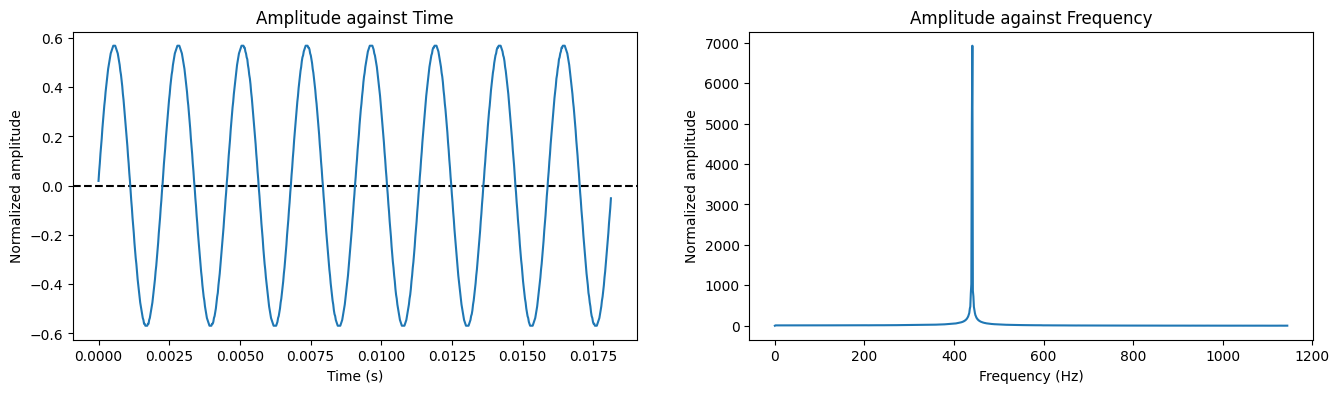

In [327]:
preview("samples/8-bit.wav", amplitude_range=(0, 800))

Shifted by -1 step(s):


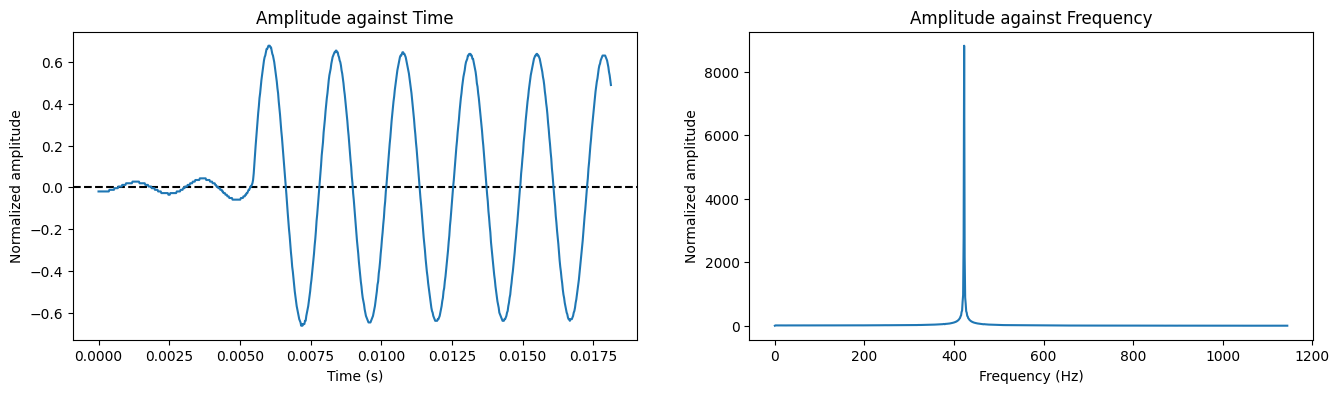

Shifted by 0 step(s):


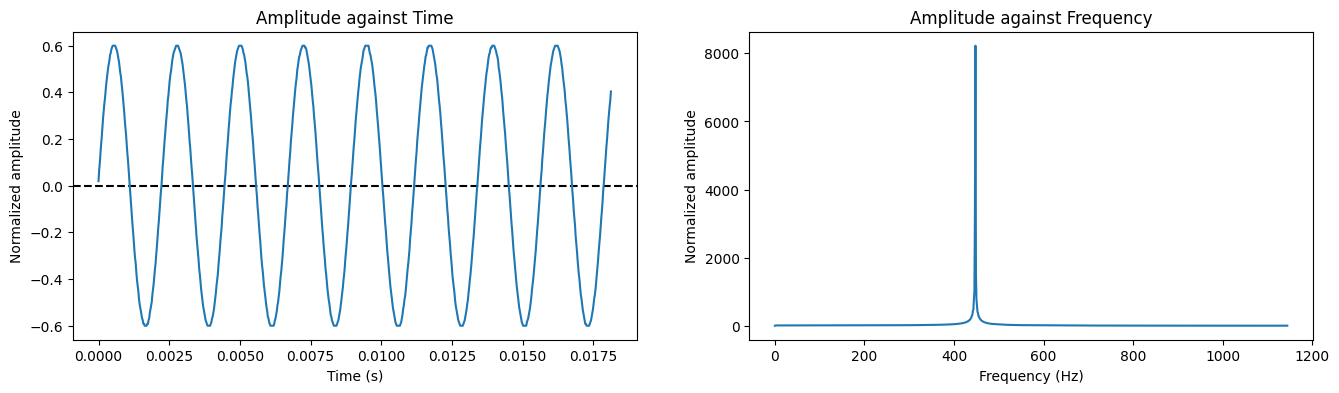

Shifted by 1 step(s):


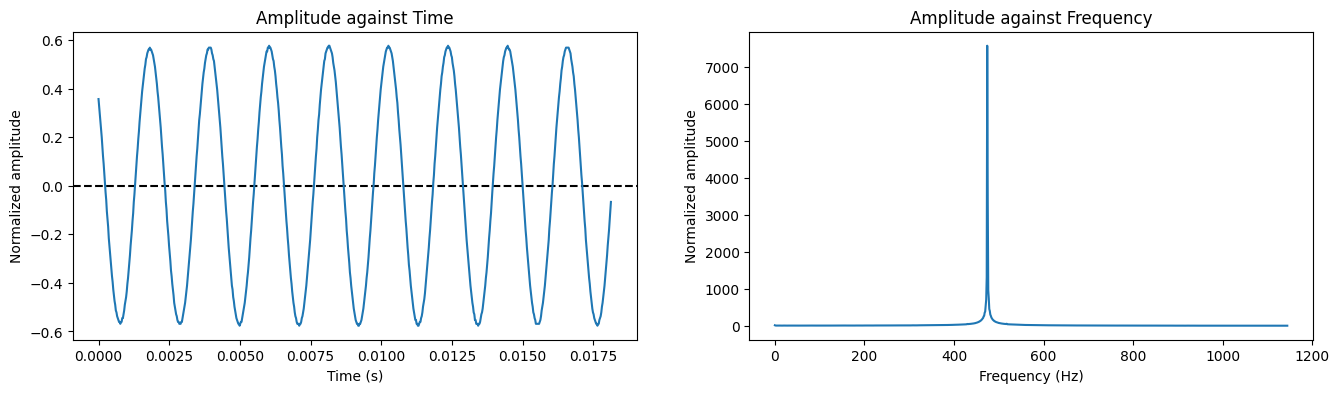

In [328]:
for file in os.listdir("demo/8-bit"):
    print(f"Shifted by {file.replace('.wav', '')} step(s):")
    preview(f"demo/8-bit/{file}", amplitude_range=(0, 800))

### 16-bit Audio

`samples/16-bit.wav` is a 16-bit audio file with a pure tone of A5 (880 Hz). The performance is considerably worse than the 8 bit version.

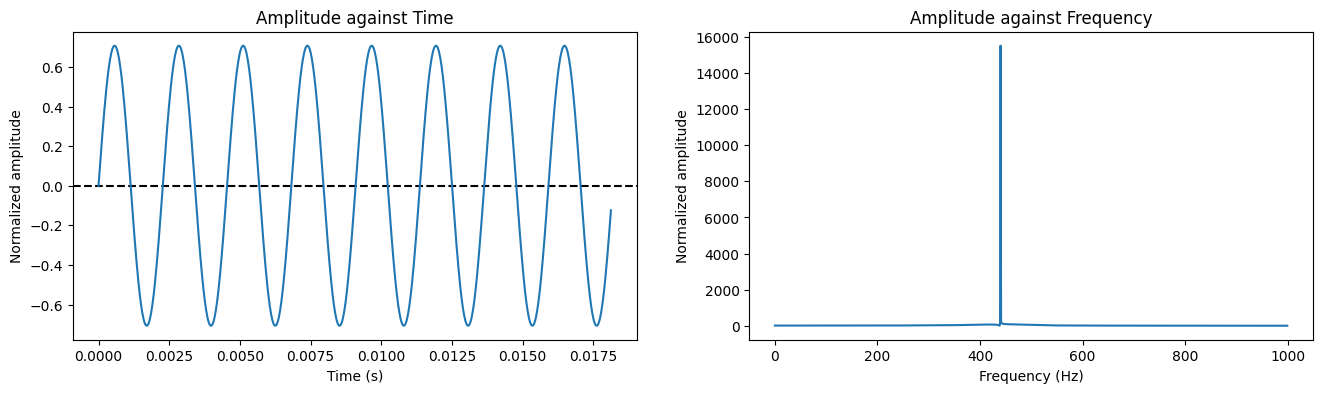

In [329]:
preview("samples/16-bit.wav", bits_per_sample=16, amplitude_range=(0, 800))

Shifted by -1 step(s):


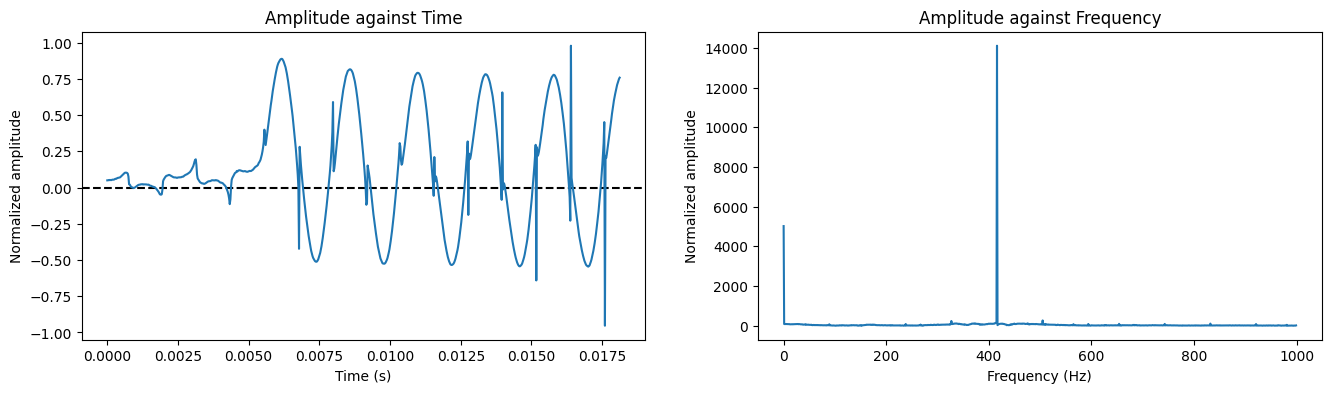

Shifted by 0 step(s):


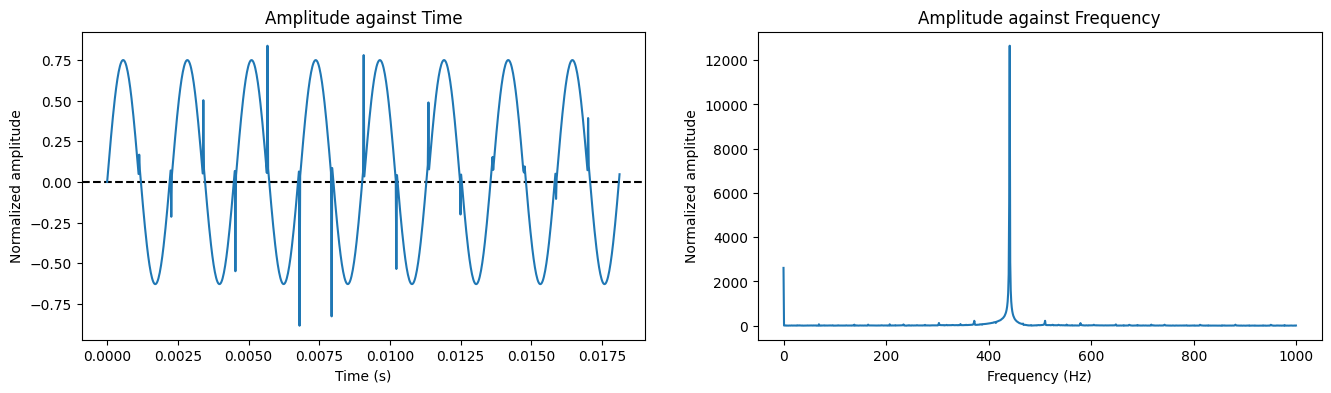

Shifted by 1 step(s):


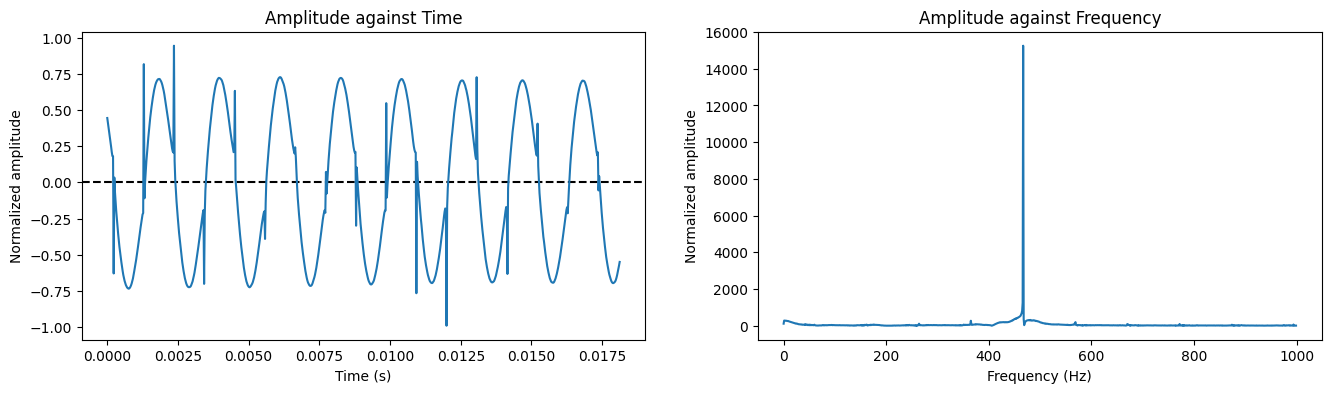

In [330]:
for file in os.listdir("demo/16-bit"):
    print(f"Shifted by {file.replace('.wav', '')} step(s):")
    preview(f"demo/16-bit/{file}", bits_per_sample=16, amplitude_range=(0, 800))

### ⚠️ Volume Warning

### Instrument Audio

Instrument audio tends to be more complex, and unsuprisingly the performance is pretty poor. However, there at least still an audible shift in the correct direction (and seemingly the correct amount).

Interestingly, this kind of works like a bad distortion pedal?

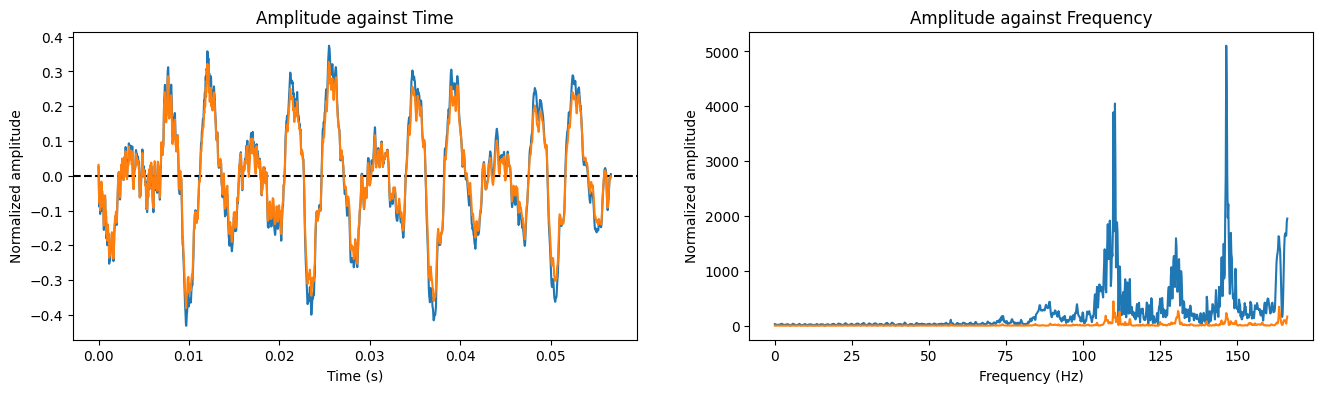

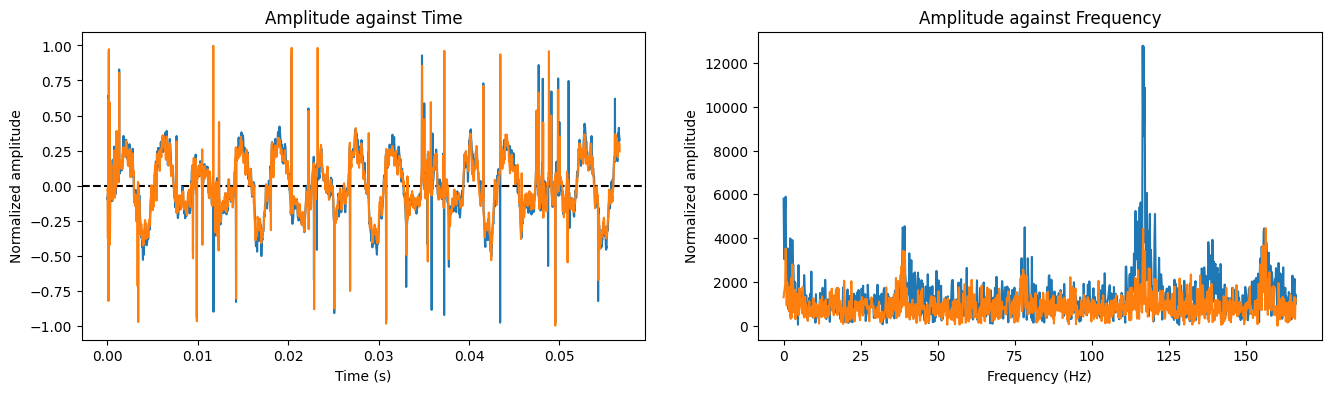

In [331]:
preview("samples/acoustic-guitar.wav", bits_per_sample=16, amplitude_range=(0, 2500))
preview("demo/acoustic-guitar.wav", bits_per_sample=16, amplitude_range=(0, 2500))

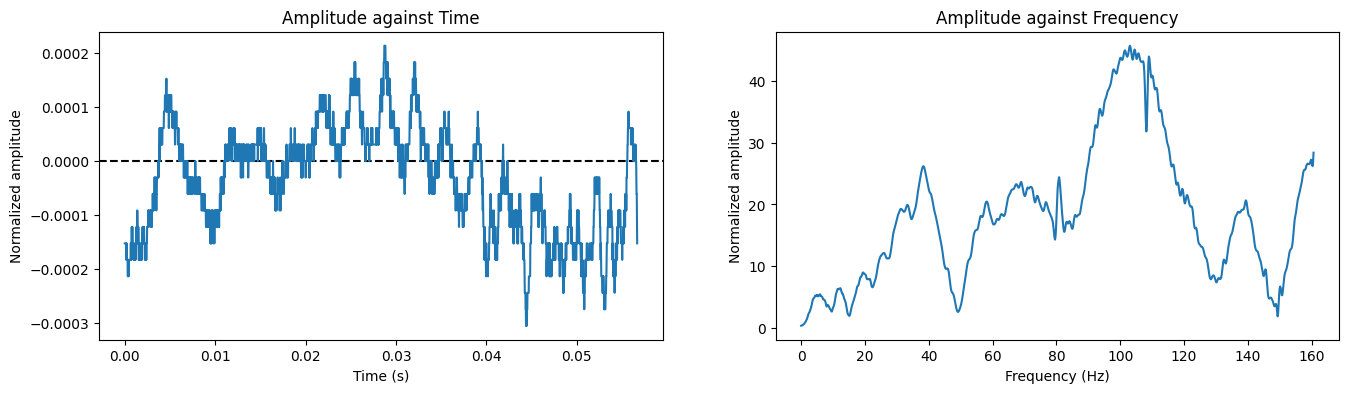

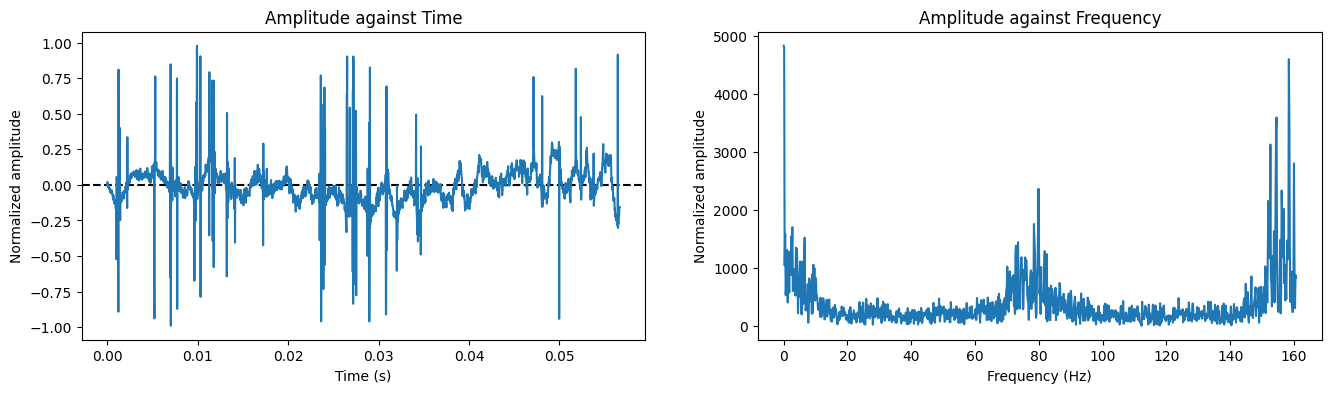

In [332]:
preview("samples/clean-guitar.wav", bits_per_sample=16, amplitude_range=(0, 2500))
preview("demo/clean-guitar.wav", bits_per_sample=16, amplitude_range=(0, 2500))